# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [19]:
!pip install ucimlrepo

In [20]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [50]:
# dataset = uci.fetch_ucirepo(id=149)

# print(dataset.metadata.name, '\n')
# print(dataset.metadata.abstract, '\n')
# print(dataset.metadata.additional_info.summary, '\n')

# Периодически не мог получить доступ к серверу, поэтому воспользовался:
# https://github.com/SouljaBoy-tell-em/ML/blob/master/homeworks/lab01_ml_pipeline/car_data.csv
# Нужно скачать файл по ссылке выше в ту же директорию, что и эта часть лабораторной работы.
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [51]:
# data = dataset.data.features
# target = dataset.data.targets

# print(data.shape, target.shape)

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [52]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,381,106,54,100,227,67,4,250,27,27,162,280,923,262,88,5,11,182,182
1,666,102,43,96,197,63,10,185,36,22,142,202,513,139,65,8,12,195,204
2,333,86,42,65,125,54,7,150,45,19,140,171,327,172,85,2,8,180,182
3,255,112,50,110,186,56,11,214,31,24,159,232,676,203,71,18,27,191,202
4,149,93,36,64,165,69,8,136,49,18,136,161,279,127,67,2,29,193,204
5,558,85,43,66,121,54,7,150,46,19,147,169,324,175,87,0,5,179,182
6,160,82,38,53,125,59,5,133,51,18,128,152,259,146,87,0,0,177,183
7,295,90,38,75,164,64,7,151,43,19,131,168,345,139,66,0,0,195,204
8,568,86,43,69,123,54,6,150,46,19,144,174,325,177,87,3,7,180,182
9,185,100,41,75,205,71,5,176,36,21,138,204,479,151,72,7,19,197,197


Methods `describe` and `info` deliver some useful information.

In [53]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,430.282332,93.588342,44.967213,82.229508,169.632058,61.863388,8.564663,169.446266,40.697632,20.619308,148.091075,189.377049,442.648452,175.852459,72.579235,6.200364,12.460838,188.868852,195.577413
std,240.886158,8.136491,6.051393,15.579856,33.332205,7.695476,4.495528,32.522751,7.645881,2.532791,14.238419,31.035856,173.064844,32.434129,7.274318,4.991226,8.854296,6.102315,7.325832
min,1.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,222.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,151.000000,68.000000,2.000000,6.000000,185.000000,191.000000
50%,432.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,176.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,634.000000,99.000000,50.000000,98.000000,197.000000,66.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,199.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,843.000000,117.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,182.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [54]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [55]:
## YOUR CODE HERE: здесь я сделал нормализацию данных, используя среднее значение и отклонение.
for i, m, s in zip(X_train_pd.columns, X_train_pd.mean(), X_train_pd.std()):
    X_train_pd[i] = (X_train_pd[i] - m) / s
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.204588,1.525431,1.492679,1.140607,1.721096,0.667485,-1.015379,2.476843,-1.791505,2.519234,0.976859,2.919944,2.775558,2.656077,2.119892,-0.240495,-0.164986,-1.125614,-1.853361
1,0.978544,1.033819,-0.325084,0.883865,0.821066,0.147699,0.319281,0.478242,-0.614400,0.545127,-0.427792,0.406722,0.406504,-1.136225,-1.041917,0.360560,-0.052047,1.004725,1.149711
2,-0.403852,-0.932631,-0.490336,-1.105884,-1.339007,-1.021820,-0.348049,-0.597928,0.562704,-0.639337,-0.568257,-0.592123,-0.668238,-0.118778,1.707482,-0.841550,-0.503805,-1.453359,-1.853361
3,-0.727656,2.262850,0.831674,1.782461,0.491055,-0.761927,0.541724,1.369925,-1.268347,1.334770,0.766161,1.373345,1.348347,0.837005,-0.217097,2.364076,1.642046,0.349236,0.876704
4,-1.167698,-0.072309,-1.481843,-1.170069,-0.138966,0.927378,-0.125605,-1.028396,1.085861,-1.034159,-0.849187,-0.914331,-0.945590,-1.506205,-0.766977,-0.841550,1.867925,0.676980,1.149711
5,0.530199,-1.055534,-0.325084,-1.041698,-1.459011,-1.021820,-0.348049,-0.597928,0.693493,-0.639337,-0.076629,-0.656565,-0.685572,-0.026283,1.982422,-1.242253,-0.842624,-1.617231,-1.853361
6,-1.122033,-1.424243,-1.151340,-1.876109,-1.339007,-0.372087,-0.792935,-1.120639,1.347440,-1.034159,-1.411047,-1.204318,-1.061154,-0.920403,1.982422,-1.242253,-1.407321,-1.944976,-1.716858
7,-0.561603,-0.441018,-1.151340,-0.464029,-0.168967,0.277645,-0.348049,-0.567180,0.301125,-0.639337,-1.200349,-0.688786,-0.564230,-1.136225,-0.904447,-1.242253,-1.407321,1.004725,1.149711
8,0.571713,-0.932631,-0.325084,-0.849142,-1.399009,-1.021820,-0.570492,-0.597928,0.693493,-0.639337,-0.287326,-0.495461,-0.679794,0.035381,1.982422,-0.641198,-0.616744,-1.453359,-1.853361
9,-1.018250,0.788013,-0.655587,-0.464029,1.061074,1.187271,-0.792935,0.201512,-0.614400,0.150305,-0.708722,0.471163,0.210046,-0.766244,-0.079627,0.160208,0.738530,1.332469,0.194188


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Best Hyperparameters: {'C': 0.1}
F1 Score: 0.7233879157303301
Accuracy: 0.734006734006734


<Figure size 1000x600 with 0 Axes>

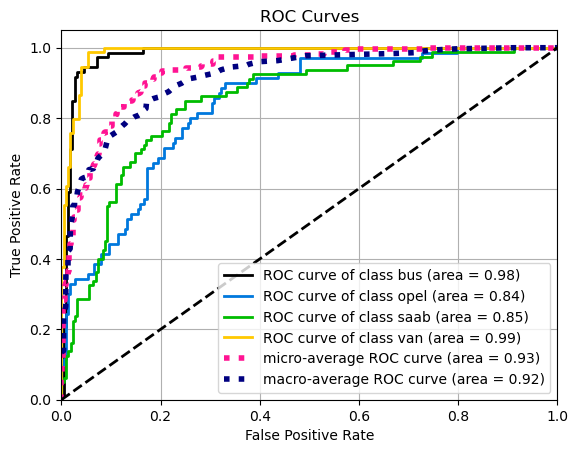

In [56]:
### YOUR CODE HERE
# примеры я смотрел здесь:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# ATTENTION: если появится ошибка запуска, то измените max_iter = 1000 или значение больше.

import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

reg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
grid = {'C':[0.01, 0.1, 1, 10]}
gridSearch = GridSearchCV(reg, grid)
gridFit = gridSearch.fit(X_train, y_train)

y_pred = gridFit.predict(X_test) 
y_prob = gridSearch.fit(X_train, y_train)

print(f'Best Hyperparameters: {gridSearch.best_params_}')
print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot ROC curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test))
plt.grid()
plt.show()

In [42]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

#  ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

PCA ratio: [6.17360736e-01 3.67590919e-01 6.58112759e-03 4.46428131e-03
 1.47463217e-03 7.02545661e-04 4.93331505e-04 4.24570045e-04
 2.79047055e-04 2.39844712e-04 1.29214339e-04 1.01806269e-04
 5.96364117e-05 5.00600502e-05 2.29362528e-05 1.53924311e-05
 6.65088237e-06 2.50178737e-06 7.66151921e-07]


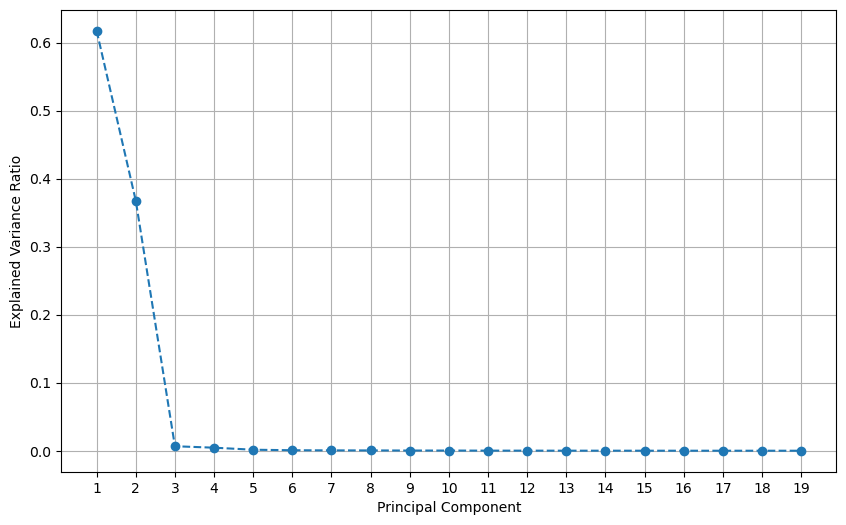

In [43]:
### YOUR CODE HERE
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
ratio = pca.explained_variance_ratio_
print("PCA ratio:", ratio)

# Plot PCA curve:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ratio) + 1), ratio, marker = 'o', linestyle = '--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(ratio) + 1))
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [57]:
### YOUR CODE HERE

DISP_BORDER = 0.99

# Посчитаем дисперсию при разном количестве компонент и замечаем, что с 3-го компонента почти ничего не меняется:
for index in range(0, 19, 1):
    print(index + 1, np.cumsum(pca.explained_variance_ratio_)[index])
    
nComponents = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= DISP_BORDER) + 1
print("\nAmount of components:", nComponents)

# Будет достаточно двух компонентов, ведь общая объясненная дисперсия уже на этом шаге будет близка к единице.
# Можно выбрать и 3 компонента, но двух будет достаточно (самое главное - не один). Параметр DISP_BORDER можно варьировать.
# Также заметим, что объясненная дисперсия равна единице при 19 компонентах.
# За результатом можно пронаблюдать в следующем пункте в зависимости от числа компонент.

1 0.6173607364889181
2 0.984951655372946
3 0.9915327829609106
4 0.9959970642723468
5 0.9974716964469993
6 0.9981742421077302
7 0.9986675736127244
8 0.9990921436578114
9 0.9993711907124094
10 0.9996110354248146
11 0.999740249763476
12 0.9998420560325162
13 0.9999016924441837
14 0.9999517524944166
15 0.9999746887472013
16 0.9999900811783391
17 0.9999967320607052
18 0.9999992338480793
19 0.9999999999999999

Amount of components: 3


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Hyperparameters: {'C': 0.1}
F1 Score: 0.7821625613319758
Accuracy: 0.7878787878787878


<Figure size 1000x600 with 0 Axes>

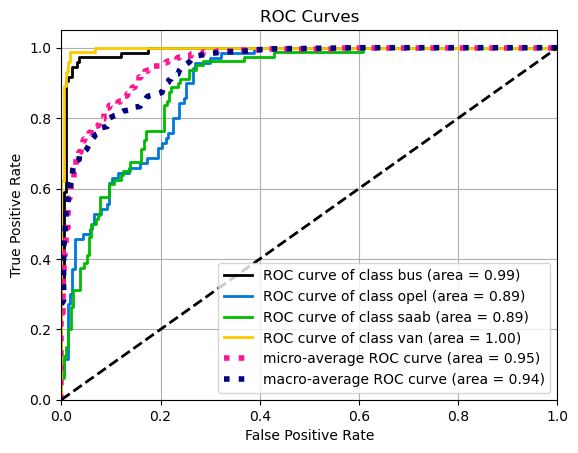

In [58]:
### YOUR CODE HERE
# Я написал функцию, в которую можно подставлять разное число компонент. В данном случае подставляется для 19, но можно выбрать
# и другое значение, например, исходя из рассуждений в предыдущем пункте.

N_COMPONENTS = 19

def execute(n_components):
    pcaOpt = PCA(n_components)
    pcaOpt.fit(X_train)
    X_train_pca = pcaOpt.fit_transform(X_train)
    X_test_pca = pcaOpt.transform(X_test)
    
    reg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
    grid = {'C':[0.01, 0.1, 1, 10]}
    gridSearch = GridSearchCV(reg, grid)
    gridFit = gridSearch.fit(X_train_pca, y_train)
    
    return X_train_pca, X_test_pca, gridSearch, gridFit
    
X_train_PCA, X_test_PCA, gridSearch, gridFit = execute(N_COMPONENTS)
y_pred = gridFit.predict(X_test_PCA) 
y_prob = gridSearch.fit(X_train_PCA, y_train)

print(f'Best Hyperparameters: {gridSearch.best_params_}')
print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot ROC curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test_PCA))
plt.grid()
plt.show()

Из-за утраты некоторого количества информации, некоторые метрики стали меньше.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

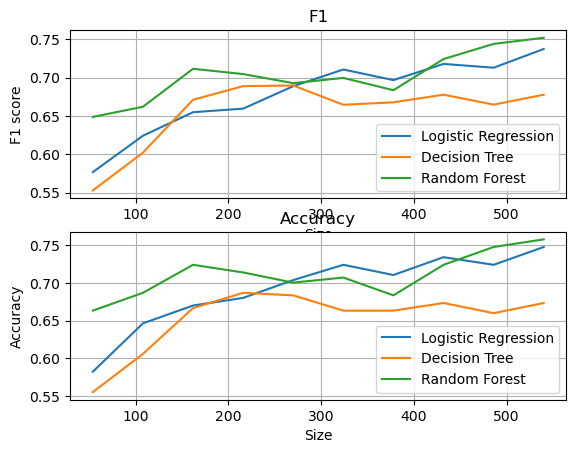

In [65]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

f1Scores = []
acScores = []
sizes = []
for i in range(1, 11, 1):
    X_train_lc = X_train[:(y_train.shape[0] // 10) * i, :]
    y_train_lc = y_train[:(y_train.shape[0] // 10) * i]
    
    reg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
    regFit = reg.fit(X_train_lc, y_train_lc)
    
    treeClassifier = DecisionTreeClassifier(max_depth = 184, random_state = 0)
    treeFit = treeClassifier.fit(X_train_lc, y_train_lc)
    
    rfClassifier = RandomForestClassifier(n_estimators = 35, random_state = 0)
    rfFit = rfClassifier.fit(X_train_lc, y_train_lc)
    
    sizes.append(i * (y_train.shape[0] // 10))
    
    f1Scores.append([f1_score(y_test, regFit.predict(X_test), average='macro'), 
                     f1_score(y_test, treeFit.predict(X_test), average='macro'), 
                     f1_score(y_test, rfFit.predict(X_test), average='macro')
                    ])
    
    acScores.append([accuracy_score(y_test, regFit.predict(X_test)), 
                     accuracy_score(y_test, treeFit.predict(X_test)), 
                     accuracy_score(y_test, rfFit.predict(X_test))
                    ])
    

plt.subplot(2, 1, 1)
plt.title("F1")
plt.xlabel("Size")
plt.ylabel("F1 score")
plt.grid()
plt.plot(sizes, f1Scores)
plt.legend(['Logistic Regression', 'Decision Tree', 'Random Forest'])
plt.subplot(2, 1, 2)
plt.title("Accuracy")
plt.xlabel("Size")
plt.ylabel("Accuracy")
plt.grid()
plt.plot(sizes, acScores)
plt.legend(['Logistic Regression', 'Decision Tree', 'Random Forest'])

Лучшее качество достигается на 325 элементах.